In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import requests
from io import StringIO


In [25]:
url = "https://raw.githubusercontent.com/kirenz/twitter-tweepy/main/tweets-obama.csv"
response = requests.get(url)
data = StringIO(response.text)
df = pd.read_csv(data)
df.head()


import re

# Function to remove URLs from text
def remove_urls(text):
    return re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

# Apply the function to the text column
df["text"] = df["text"].apply(remove_urls)


In [27]:
df["text"] = df["text"].str.lower()


In [29]:
nltk.download('punkt')
df["tokens"] = df["text"].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

df["tokens"] = df["tokens"].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
all_words = [word for tokens in df["tokens"] for word in tokens]
freq_dist = FreqDist(all_words)
df["tokens"] = df["tokens"].apply(lambda x: [word for word in x if freq_dist[word] > 2])  # Keeping words that appear more than twice


In [35]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df["tokens"] = df["tokens"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


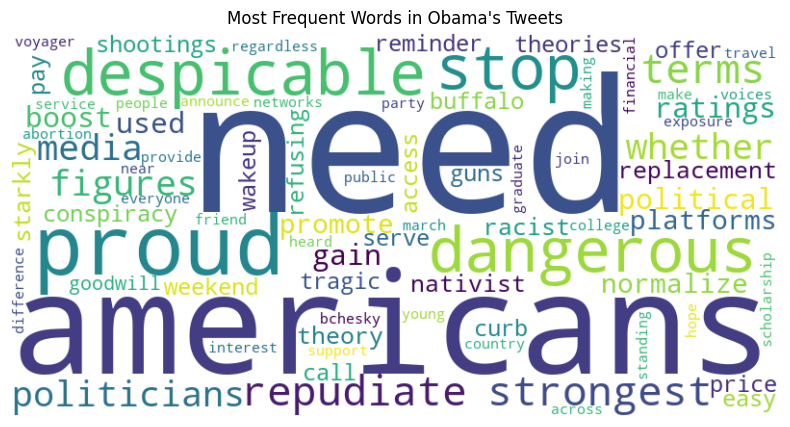

In [37]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Obama's Tweets")
plt.show()


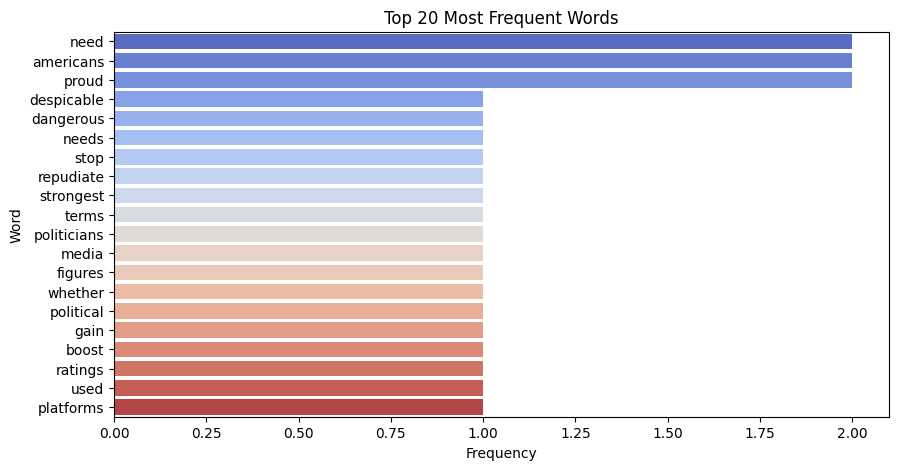

In [39]:
top_words = pd.DataFrame(freq_dist.most_common(20), columns=["Word", "Frequency"])

plt.figure(figsize=(10,5))
sns.barplot(x="Frequency", y="Word", data=top_words, palette="coolwarm")
plt.title("Top 20 Most Frequent Words")
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


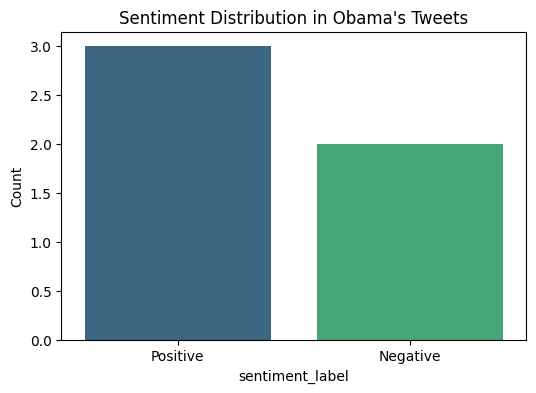

In [41]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df["sentiment"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment_label"] = df["sentiment"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

sentiment_counts = df["sentiment_label"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution in Obama's Tweets")
plt.ylabel("Count")
plt.show()


In [45]:
df["popularity_score"] = df["text"].apply(len)  # Tweet length as a measure of popularity


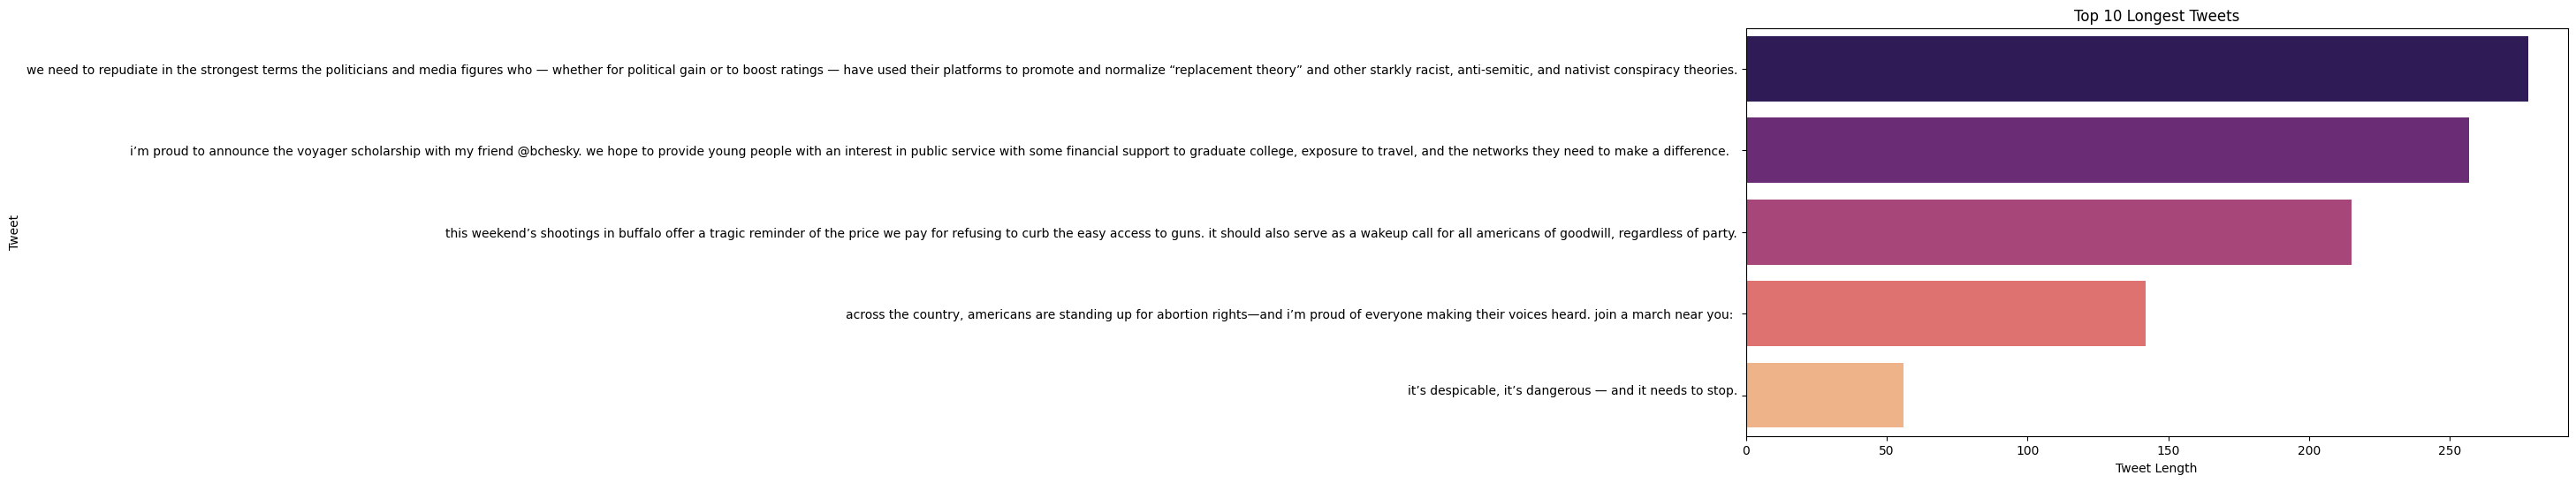

In [47]:
df_sorted = df.sort_values(by="popularity_score", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=df_sorted["popularity_score"], y=df_sorted["text"], palette="magma")
plt.xlabel("Tweet Length")
plt.ylabel("Tweet")
plt.title("Top 10 Longest Tweets")
plt.show()
